# DS 3000 Project
## Mass Shootings: How can we stop them?
### Emily Dolan, Benjamin Ecsedy, Yujin Kang, Robert Harrison Voigt

In [1]:
# importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# defining dictionary to convert state abbreviations to state names
state_dict = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio', 
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming'
}

In [3]:
# importing laws dataframe
df_laws = pd.read_csv('ICPSR_37363/DS0001/37363-0001-Data.tsv', sep='\t')
df_laws

,STATE,YEAR,FELONY,INVCOMMITMENT,INVOUTPATIENT,DANGER,DRUGMISDEMEANOR,ALCTREATMENT,ALCOHOLISM,RELINQUISHMENT,...,EXPARTEDATING,DVROSURRENDER,DVROSURRENDERNOCONDITIONS,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alaska,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,California,1991,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Virginia,2019,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1446,Washington,2019,1,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,49
1447,West Virginia,2019,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,18
1448,Wisconsin,2019,1,1,1,1,0,1,0,0,...,0,1,1,1,0,0,0,0,1,23


In [4]:
# importing and cleaning shootings dataframe
df_shootings = pd.read_csv('Violence Project Mass Shooter Database.csv')
df_shootings.columns = df_shootings.iloc[0]
df_shootings = df_shootings.iloc[1:]

# dropping shootings in DC since there's no law data in the dataset
df_shootings = df_shootings[df_shootings['State'] != 'DC'].reset_index()

# converting state abbreviations to state names
for idx in range(len(df_shootings)):
    df_shootings.loc[idx, 'State'] = state_dict[df_shootings.loc[idx, 'State']]
    
# converting years to ints
df_shootings['Year'] = df_shootings['Year'].astype('int')

# only keeping data from between 1991 and 2019 to match timeframe of laws dataset
df_shootings = df_shootings[(df_shootings['Year'] >= 1991) & (df_shootings['Year'] <= 2019)].reset_index()

df_shootings

,level_0,index,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
0,39,40,40,Harris,Joseph,10/10/1991,Thursday,10,10,1991,...,1,3,2,1,"bulletproof vest, gas mask, samurai sword, han...",2,0,0,1,1
1,40,41,41,Hennard,George,10/16/1991,Wednesday,16,10,1991,...,0,3,2,0,NaN,0,1,0,2,0
2,41,42,42,Lu,Gang,11/1/1991,Friday,1,11,1991,...,1,1,2,0,NaN,0,1,0,2,0
3,42,43,43,Daigneau,Robert,11/9/1991,Saturday,9,11,1991,...,0,3,1,0,NaN,0,1,0,2,0
4,43,44,44,McIlvane,Thomas,11/14/1991,Thursday,14,11,1991,...,0,3,1,0,NaN,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,166,168,169,Crusius,Patrick,8/3/2019,Saturday,3,8,2019,...,0,1,1,1,ear protection,2,0,0,3,NaN
128,167,169,170,Betts,Connor,8/4/2019,Sunday,4,8,2019,...,0,1,2,1,"mask, body armor",1,2,0,2,0
129,168,170,171,Ator,Seth,8/31/2019,Saturday,31,8,2019,...,0,1,1,0,NaN,1,2,0,2,0
130,169,171,172,Anderson,David,12/10/2019,Tuesday,10,12,2019,...,0,3,5,1,"Pipe bomb, homemade silencer, homemade device ...",1,2,0,2,0


In [5]:
# adding up number of deaths for each state over each year
df_shootings = df_shootings[['State', 'Year', 'Number Killed']]
df_shootings = df_shootings.astype({'Number Killed' : 'int32'})
df_deaths = df_shootings.groupby(by=['State', 'Year']).sum()

deaths = list()

# adding this information to laws dataframe
for idx in range(len(df_laws)):
    state, year = df_laws.loc[idx, 'STATE'], df_laws.loc[idx, 'YEAR']
    
    if df_deaths.index.isin([(state, year)]).any():
        deaths.append(df_deaths.loc[(state, year), :])
    else:
        deaths.append(0)

df_laws['DEATHS'] = deaths
df_laws = df_laws.astype({'DEATHS' : 'int'})
df_laws

,STATE,YEAR,FELONY,INVCOMMITMENT,INVOUTPATIENT,DANGER,DRUGMISDEMEANOR,ALCTREATMENT,ALCOHOLISM,RELINQUISHMENT,...,DVROSURRENDER,DVROSURRENDERNOCONDITIONS,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,DEATHS
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,15,0
1,Alaska,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
2,Arizona,1991,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0
3,Arkansas,1991,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
4,California,1991,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Virginia,2019,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,13,12
1446,Washington,2019,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,49,0
1447,West Virginia,2019,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,18,0
1448,Wisconsin,2019,1,1,1,1,0,1,0,0,...,1,1,1,0,0,0,0,1,23,0


In [13]:
# Random Forest Regression
# splitting test and train data
x = df_laws.iloc[:, 2:-2]
y = df_laws.iloc[:, -1]

# fitting random forest regressor to train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
rf = RandomForestRegressor(random_state=7)
rf.fit(x_train, y_train)

# predicting using test data
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

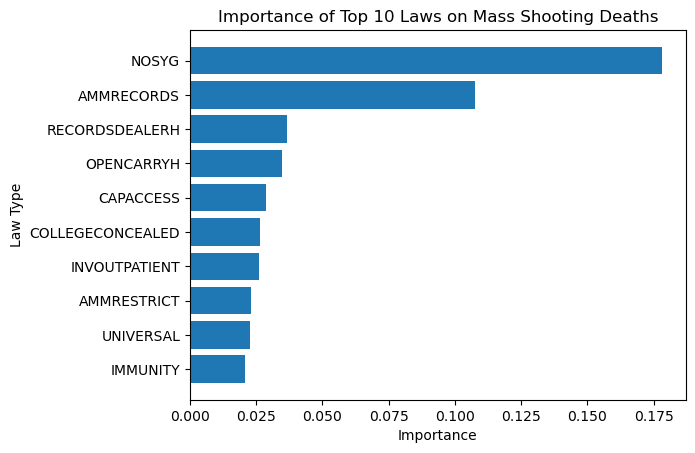

In [41]:
# plotting feature importance
n = 10

# sorting column and feature importance lists
laws = [col for _, col in sorted(zip(rf.feature_importances_, x.columns))]
feat_imps = sorted(rf.feature_importances_)

# plotting feature importances
plt.barh(laws[-n:], feat_imps[-n:])
plt.title(f'Importance of Top {n} Laws on Mass Shooting Deaths')
plt.xlabel('Importance')
plt.ylabel('Law Type')
plt.show()

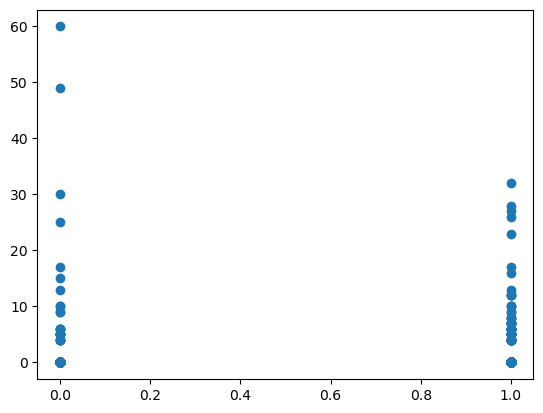

In [43]:
# seeing correlation between feature and deaths
feat = 'NOSYG'
plt.plot(df_laws[feat], df_laws['DEATHS'], 'o')